# Advanced Regression Assignment
## House Price Prediction
---

## Problem Statement
---
Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

Find out:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

## Business Understanding
---

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file.

The company is looking at prospective properties to buy to enter the market.

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further the model will be a good way for management to understand the pricing dynamics of a new market.

### Analysis approach

---

 - Read, understand, and clean the data
 - Prepare the data for modelling (train-test split, rescaling)
 - asdad
 - asdad
 - asdd

### Read, understand, and clean the data

In [902]:
# Import required python libraries to work with CSV file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [903]:
# Load given dataset day.csv file in dataset variable
dataset = pd.read_csv("train.csv")
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [904]:
# Get basic information about dataset
dataset.shape

(1460, 81)

In [905]:
# Get basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [906]:
# Get basic information about dataset
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [907]:
# Drop irrelevant columns that will not affect the house price
# Id - this is an index column

column_names_irrelevant = ['Id']
dataset.drop(column_names_irrelevant, axis = 1, inplace=True)
dataset.shape

(1460, 80)

### Handling Null values

In [908]:
# Find number of null values in each column
dataset.isna().sum().sort_values(ascending = False).head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
Fireplaces         0
Functional         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
dtype: int64

[]

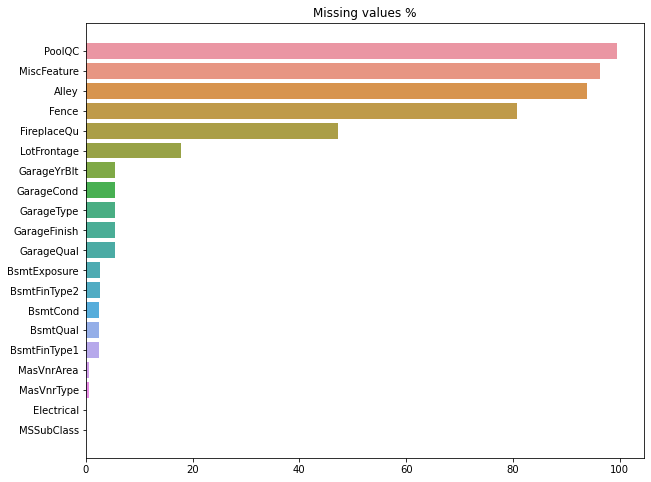

In [909]:
missing_vals_percent = (dataset.isnull().sum() / dataset.isnull().count()*100).sort_values(ascending = False).head(20)

plt.figure(figsize = (10, 8))
sns.barplot(missing_vals_percent[:] , missing_vals_percent[:].index)
plt.title('Missing values %')
plt.plot()

In [910]:
# Drop Top 4 features as those have a lot of data missing

cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1460, 76)

In [911]:
dataset.isna().sum().sort_values(ascending = False).head(20)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
Fireplaces        0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
dtype: int64

In [912]:
# As per data_description file provided - NA value actually have a real meaning,
# for e.g. FireplaceQu NA means 'No Fireplace', Alley NA means 'No Alley access'
# Replacing meaningful 'NA' values with 'None' value
# so that python isna() function can distinguish between real null and meaningful null

columns_with_meaningful_NA_value = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish',
                                    'GarageQual', 'GarageCond']

for col in columns_with_meaningful_NA_value:
    dataset[col] = dataset[col].fillna('None')


dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0.0)

dataset.shape

(1460, 76)

In [913]:
dataset.isna().sum().sort_values(ascending = False).head(20)

LotFrontage     259
MasVnrType        8
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
MSSubClass        0
GarageType        0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
BedroomAbvGr      0
dtype: int64

In [914]:
# Columns left with null values = ['LotFrontage', 'MasVnrArea' , 'MasVnrType', 'Electrical']

# Filling LotFrontage Continuous variables with median value
dataset['LotFrontage']= dataset['LotFrontage'].fillna(dataset['LotFrontage'].median())

# Filling MasVnrType with None (No Masonry veneer)
dataset['MasVnrType']= dataset['MasVnrType'].fillna('None')

# Filling MasVnrArea with 0 (No Masonry veneer - zero area)
dataset['MasVnrArea']= dataset['MasVnrArea'].fillna(0)

# Filling Electrical with mode value (SBrkr)
dataset['Electrical']= dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [915]:
dataset.isna().sum().sum()

0

#### `Dataset does not contain any null value now.`

### Handle duplicates

In [916]:
# Find and drop duplicate values
dataset.drop_duplicates()
dataset.shape

(1460, 76)

### Handle Outliers

In [917]:
numeric_columns = dataset.select_dtypes(exclude=object).columns
print('Total Numeric columns: ' + str(len(numeric_columns)))

Total Numeric columns: 37


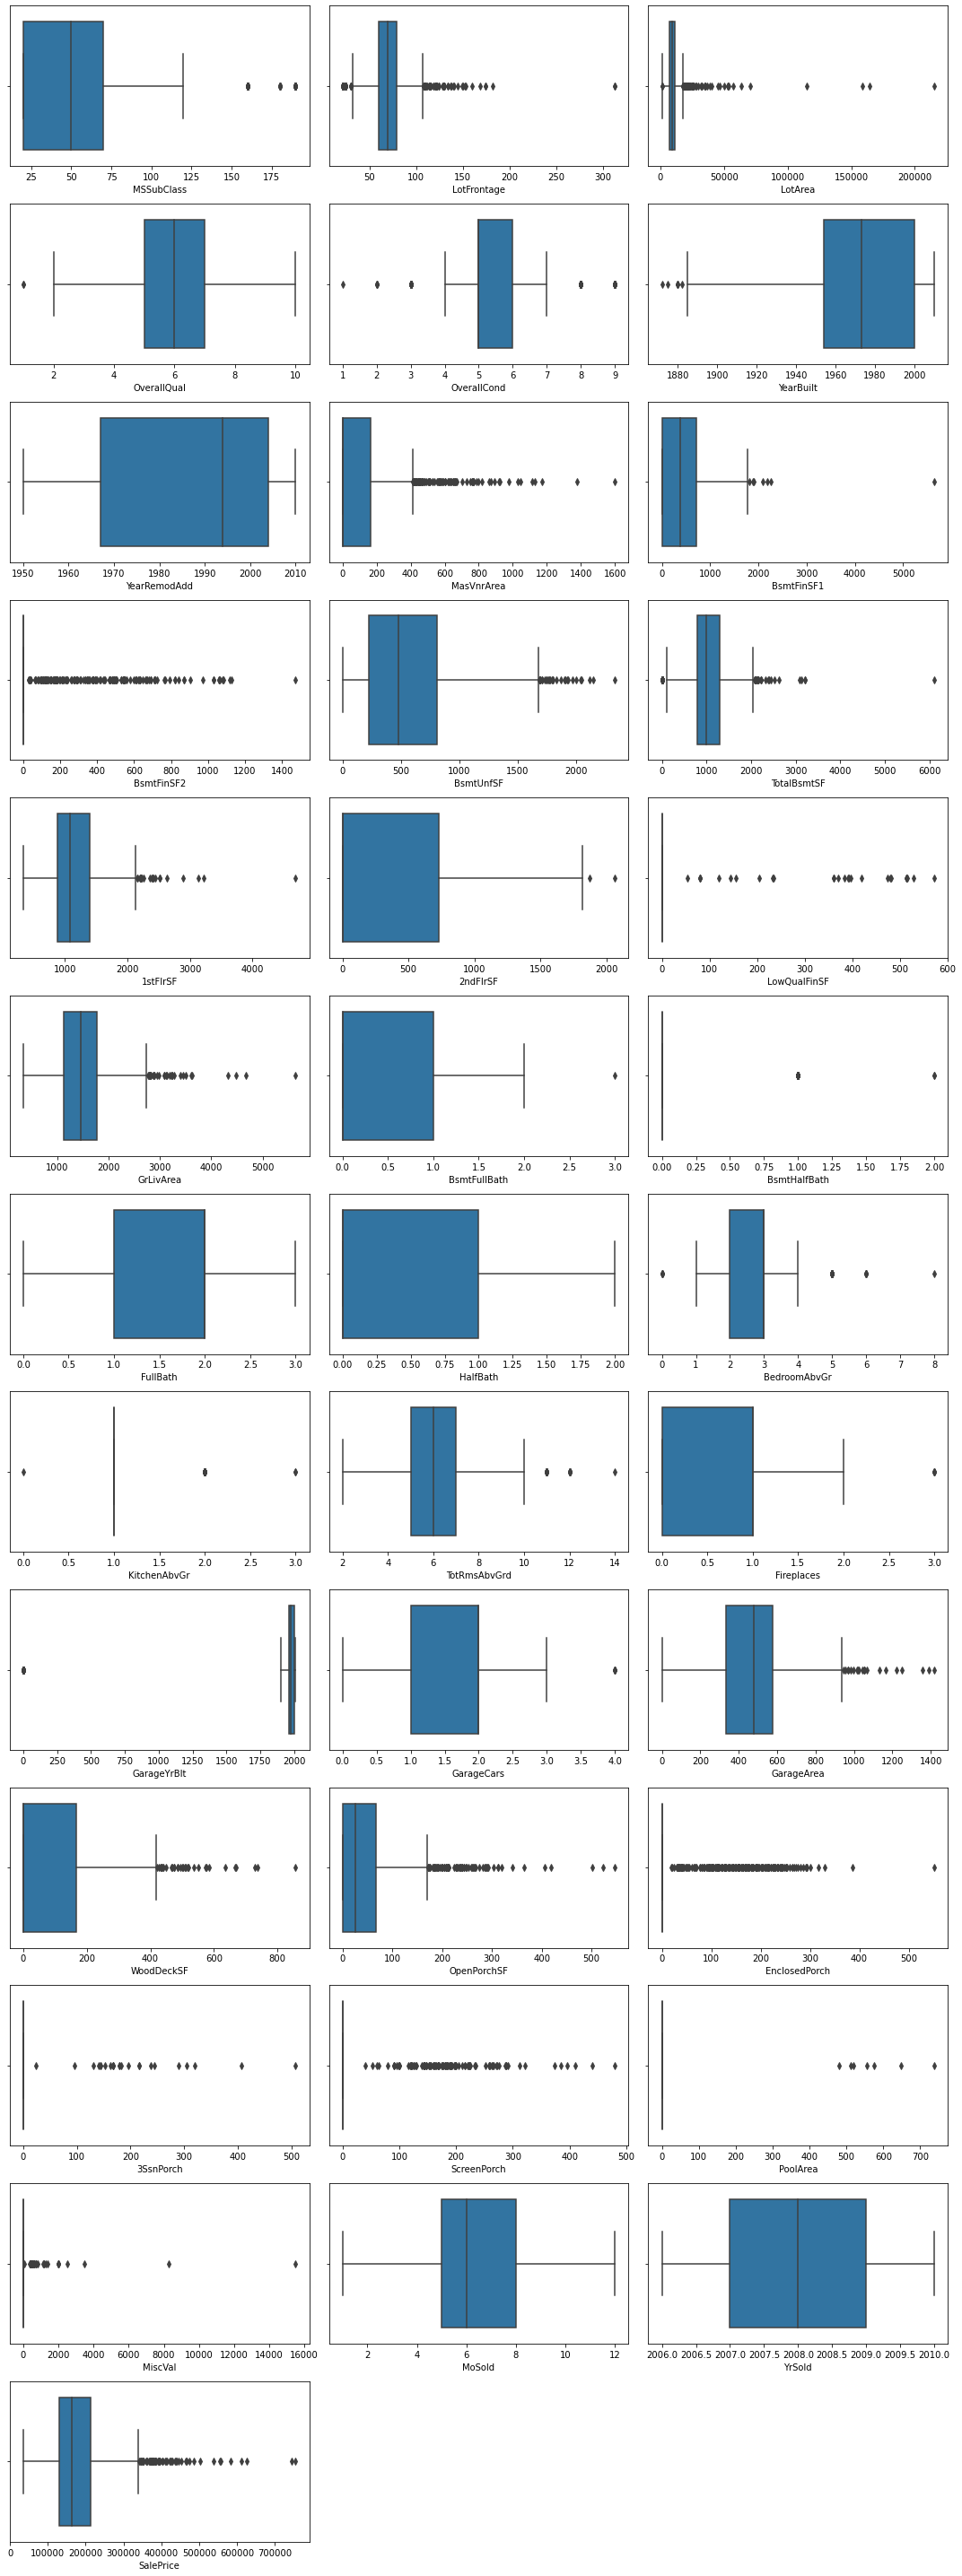

In [918]:
# Box Plot features to visualize outliers
plt.figure(figsize = (15, 40))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(13, 3, plotCounter)
    sns.boxplot(dataset[col])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations:
 - Lot of outliers are visible in LotFrontage, LotArea, MasVnrArea, BsmtFinSF2 and other features
 - Few features have most values unique like PoolArea, MiscVal, 3SsnPorch, ScreenPorch etc.

In [919]:
# Based on above observations, we can drop few columns

cols_to_drop = ['PoolArea', 'MiscVal', '3SsnPorch']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1460, 73)

In [920]:
# For using IQR method to drop outliers, we need to find all features with numeric values
# Use data type of column to find numeric features
dataset.select_dtypes(exclude=object).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [921]:
# Drop outliers for all numeric features using IQR method
numerical_columns = dataset.select_dtypes(exclude=object).columns

def drop_outlier_rows(dataset, col):
    Q1 = dataset[col].quantile(.05)
    Q3 = dataset[col].quantile(.95)
    IQR = Q3 - Q1
    lower_Range = Q1 - (1.5 * IQR)
    upper_Range = Q3 + (1.5 * IQR)
    dataset = dataset[(dataset[col] >= lower_Range) & (dataset[col] <= upper_Range)]
    return dataset

for col in numerical_columns:
    dataset = drop_outlier_rows(dataset, col)

dataset.shape

(1275, 73)

### Derived features

In [922]:
# Looking at month, year related columns
# time_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold']

# we can derive age of the property
# BuiltAge  = 2010 - YearBuilt
# RemodAge  = 2010 - YearRemodAdd
# GarageAge = 2010 - GarageYrBlt
# SoldAge = 2010 - YrSold
# Maximum year available in dataset is 2010, so calculating age at 2010

dataset['BuiltAge'] = 2010 - dataset['YearBuilt']
dataset['RemodAge'] = 2010 - dataset['YearRemodAdd']
dataset['GarageAge'] = 2010 - dataset['GarageYrBlt']
dataset['SoldAge'] = 2010 - dataset['YrSold']

# we can now drop actual years
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
dataset.drop(cols_to_drop, axis = 1, inplace=True)
dataset.shape

(1275, 73)

### Correlated features

In [923]:
numeric_columns = dataset.select_dtypes(exclude=object).columns

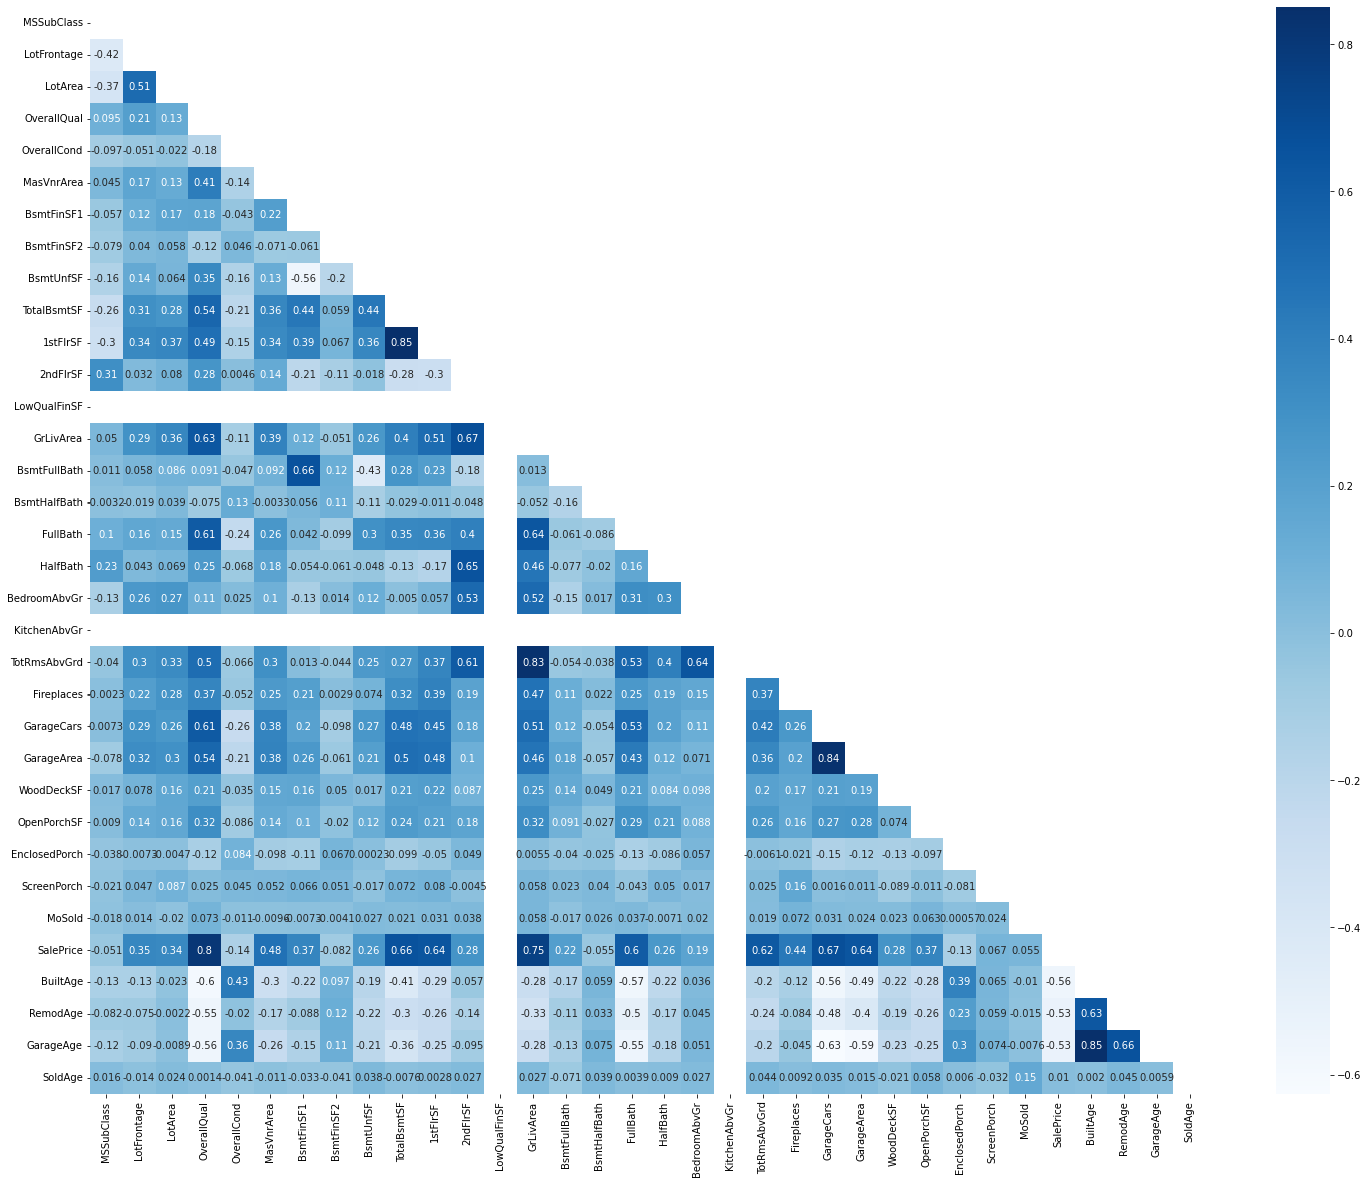

In [924]:
# plot correlation graph

plt.figure(figsize = (25, 20))

mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
sns.heatmap(dataset.corr(), mask = mask, cmap="Blues", annot = True)

plt.show()

#### Observations:
 - 1stFlrSF is related to TotalBsmtSf (0.86)
 - TotRmsAbvGrd is related to GrLivArea (0.84)
 - GarageArea is related to GarageCars (0.84)
 - GarageAge is related to BuiltAge
 - SalePrice is related to OverallQual, GrLivArea, GarageCars, GarageArea, TotalRmsAbvGrd, TotalBsmtSf, 1stFlrSf, FullBath

In [925]:
# Based on above observations, removing correlated columns

col_names_related = ['TotRmsAbvGrd', 'GarageArea']
dataset.drop(col_names_related, axis = 1, inplace=True)
dataset.shape

(1275, 71)

### Visualizing trends

In [926]:
numeric_columns = dataset.select_dtypes(exclude=object).columns
print('Total Numeric Columns :' + str(len(numeric_columns)))

Total Numeric Columns :32


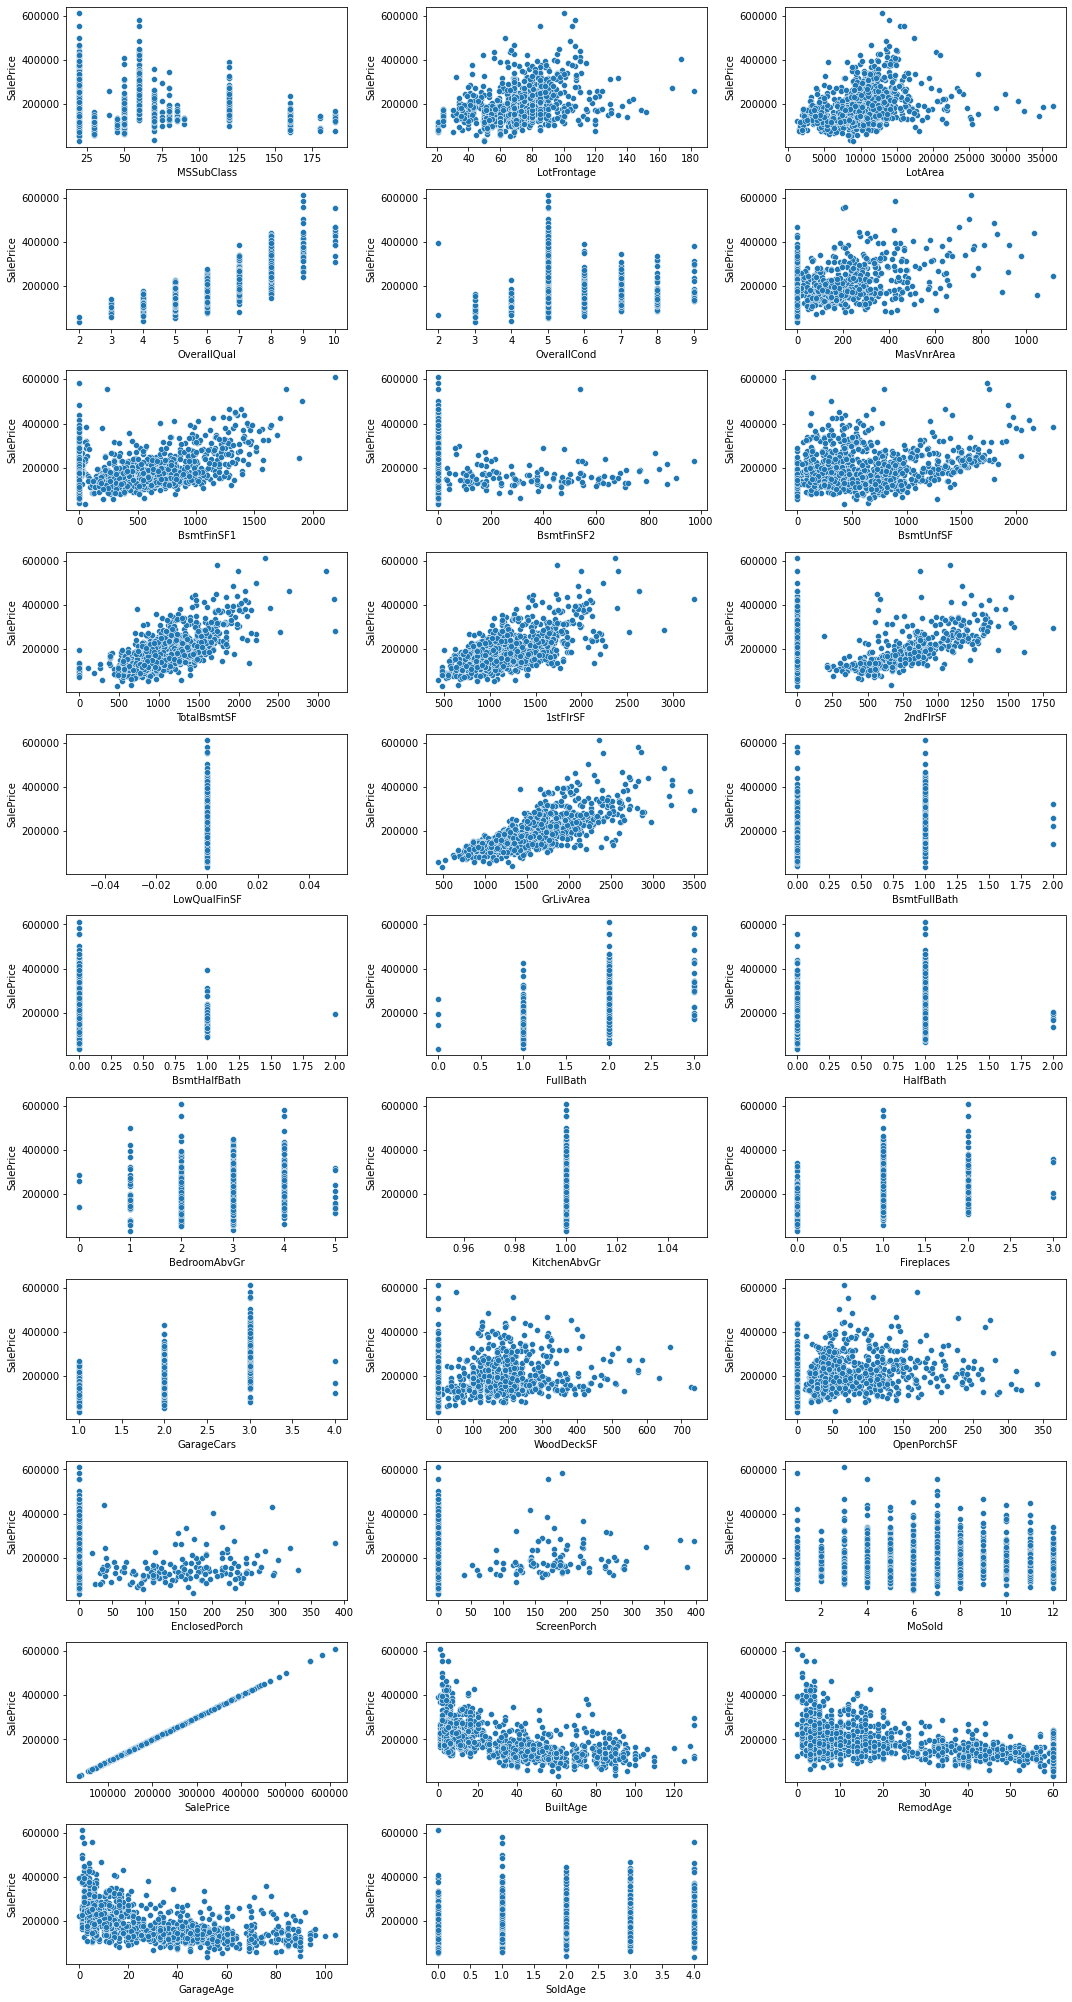

In [927]:
# Plotting Scatter plots to understand feature trend with sale price
plt.figure(figsize=(15, 30))

plotCounter = 1
for col in numeric_columns:
    plt.subplot(12, 3, plotCounter)
    sns.scatterplot(x = col, y = 'SalePrice', data = dataset)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations:
 - Lot of numeric variables are also categorical in nature (all graphs with vertical bars)
 - LotFrontage, LotArea, GrLivArea, GarageArea are few of the features that show a linear trend with saleprice
 - KitchenAbvGr, LowQualFinSF features have single vertical bar in graph - that shows all values for these features are same, and these can be dropped

In [928]:
# Based on above observations, few features can be dropped
col_names_with_all_values_same = ['LowQualFinSF', 'KitchenAbvGr']
dataset.drop(col_names_with_all_values_same, axis = 1, inplace=True)
dataset.shape

(1275, 69)

In [929]:
category_columns = dataset.select_dtypes(include=object).columns
print('Total Category Columns :' + str(len(category_columns)))

Total Category Columns :39


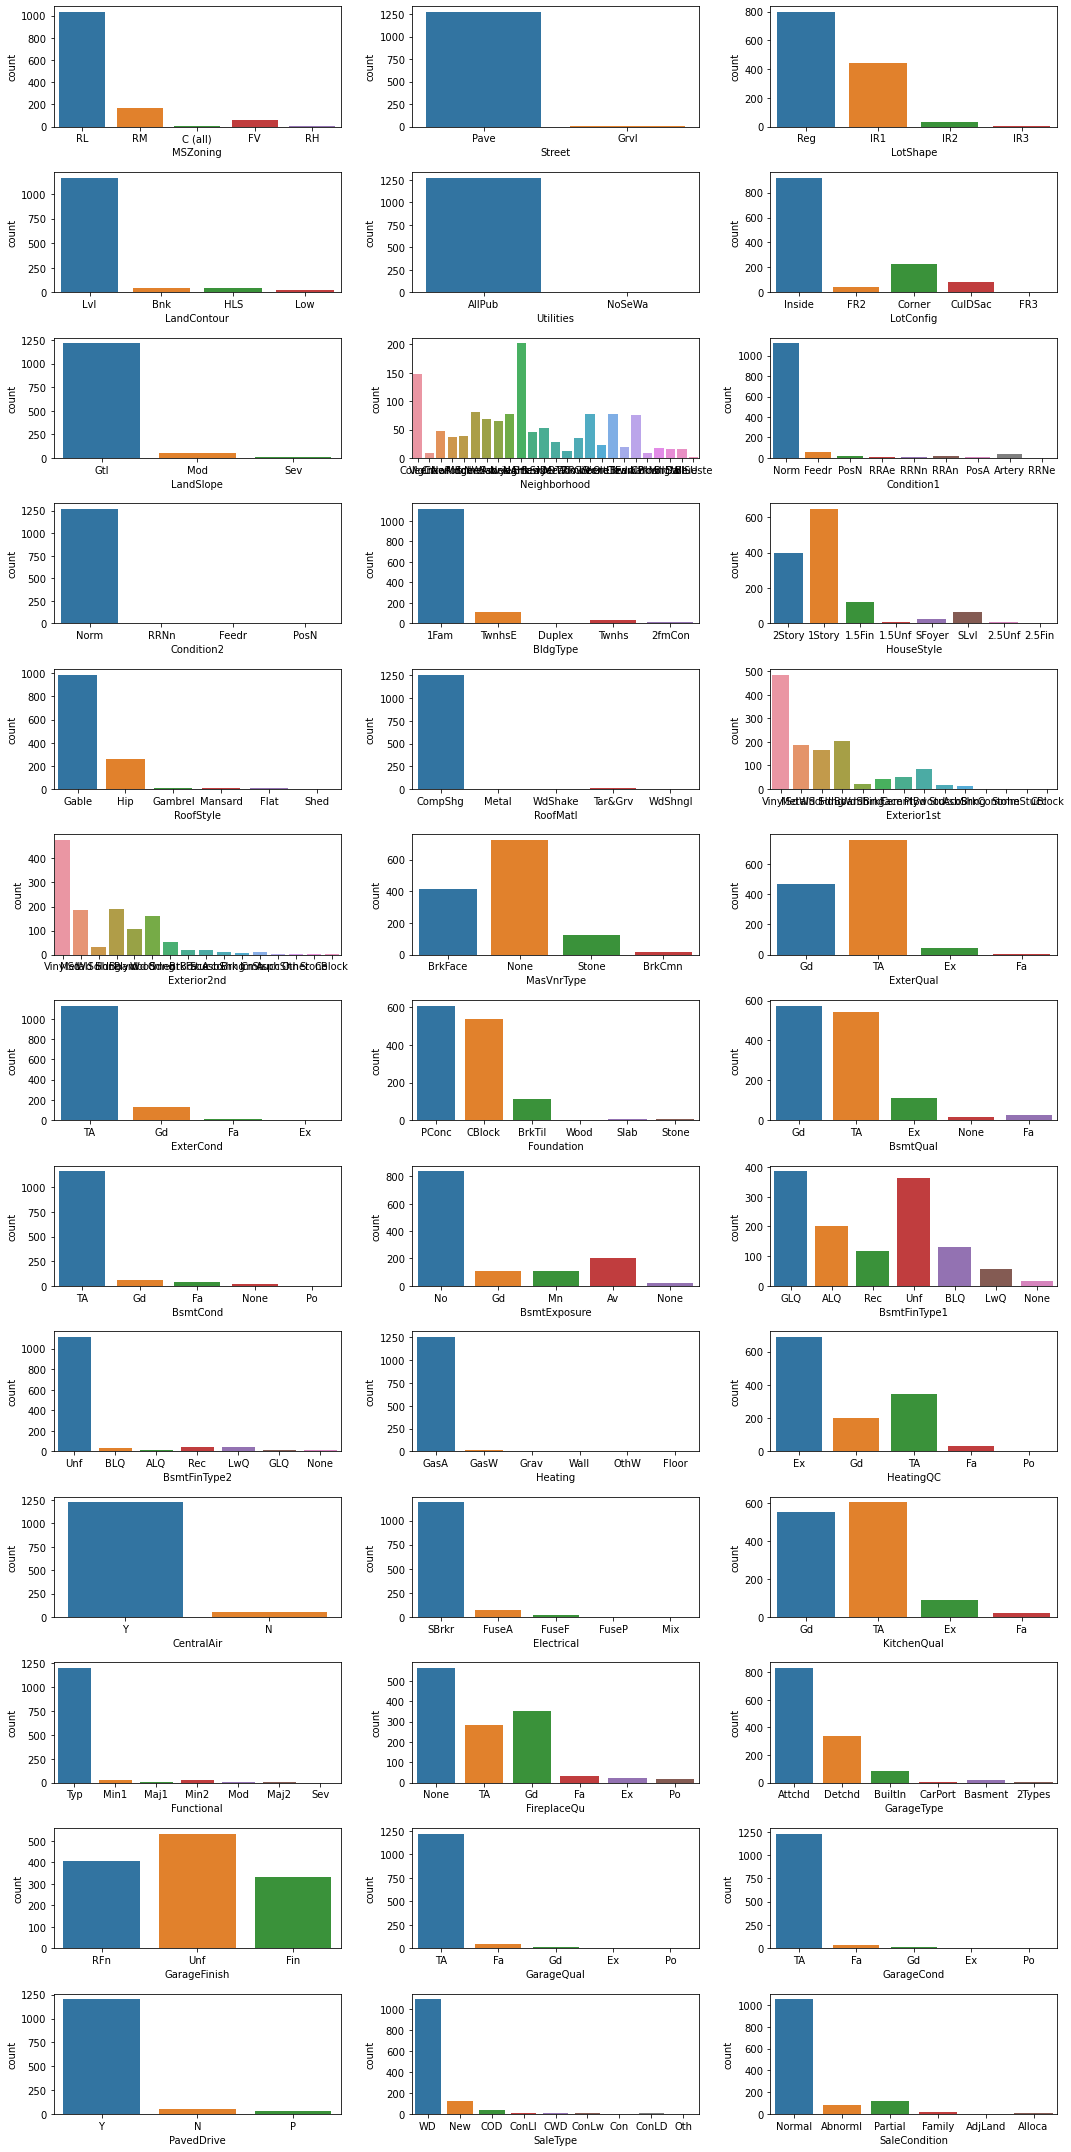

In [930]:
# Plotting histogram plots to understand feature trend with sale price
plt.figure(figsize=(15, 30))

plotCounter = 1
for col in category_columns:
    plt.subplot(13, 3, plotCounter)
    sns.countplot(col, data = dataset)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations
 - Street, Utilities, Condition2, CentralAir, Functional, GarageQual are feature dominated by single category

### Prepare the data for modelling (train-test split, rescaling)

### Encode Variables

In [931]:
# Create Dummy variables for all categorical columns
category_columns = dataset.select_dtypes(include=object).columns

for col in category_columns:
    datasetCol = pd.get_dummies(dataset[col], prefix = col, drop_first=True)
    dataset = pd.concat([dataset, datasetCol], axis = 1)
    dataset.drop(col, axis = 1, inplace = True)

dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,SalePrice,BuiltAge,RemodAge,GarageAge,SoldAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,0,2,0,61,0,0,2,208500,7,7,7.0,2,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1

In [932]:
dataset.shape

(1275, 227)

### Split the dataset into train and test

In [933]:
# import required libraries
import sklearn 
from sklearn.model_selection import train_test_split

In [934]:
# Prepare dependant and independant variables
y = dataset.pop('SalePrice')
X = dataset

In [935]:
# scaling the features - necessary before using Ridge or Lasso
#from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
#cols = X.columns
#X = pd.DataFrame(scale(X))
#X.columns = cols
#X.columns

In [936]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, train_size = 0.7, random_state = 100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(892, 226)
(383, 226)
(892,)
(383,)


### Data Scaling

In [937]:
from sklearn.preprocessing import MinMaxScaler

In [938]:
numeric_columns = X_train.select_dtypes(exclude=object).columns

scaler = MinMaxScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,BuiltAge,RemodAge,GarageAge,SoldAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
82,0.000000,0.387755,0.253011,0.750,0.333333,0.419731,0.015082,0.000000,0.710636,0.505171,0.457317,0.000000,0.368249,0.0,0.0,0.666667,0.0,0.6,0.333333,0.666667,0.215569,0.271978,0.0,0.0,0.818182,0.015504,0.050000,0.028846,0.50,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.

### Train the model

### Linear Regression

In [939]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [940]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [941]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

5277255688923703.0
[-3.36332501e+04  1.47201283e+04  5.26134189e+04  5.17685630e+04
  3.68484614e+04  1.54724848e+04  1.50974323e+14  6.70690320e+13
  1.48559286e+14 -2.13489285e+14 -2.02848506e+16 -1.49909993e+16
  2.51911457e+16  3.34027734e+03 -2.88826172e+02  7.31225024e+03
  1.14031836e+03 -2.29652266e+04 -3.58795898e+02  2.24359531e+04
  7.03719824e+03  8.61218555e+03  7.27548438e+03  1.71762021e+04
 -3.94504590e+03 -4.06462266e+04 -5.96679785e+03 -6.34010156e+03
  1.09125391e+03  3.76467891e+04  2.78690547e+04  2.86188125e+04
  2.26062969e+04  4.57500078e+04 -6.11690527e+03 -1.43801978e+04
  2.59358594e+03  5.34780664e+03 -1.35318262e+04  6.45994629e+02
 -3.58214697e+04  7.04810938e+03 -1.02890630e+04 -1.73496660e+04
 -1.53849609e+03 -1.73921875e+03 -1.15276663e+04  6.62739453e+03
  1.47437012e+04  9.86974402e+03  1.84234766e+03 -4.97138281e+03
  2.16782207e+04 -1.12600039e+04 -9.71648438e+03  4.88929883e+03
  5.23529590e+03 -1.07455566e+04 -1.00214941e+04  1.85073481e+04
 -1.05

In [942]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score train : ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score test  : ', r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score train : ', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score test  : ', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE score test  : ', mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score train :  0.9398263346735599
R2 score test  :  -2.169493589187708e+19
RSS score train :  285845961073.0
RSS score test  :  5.013787310436124e+31
MSE score train :  320455113.3105381
MSE score test  :  1.309082848677839e+29


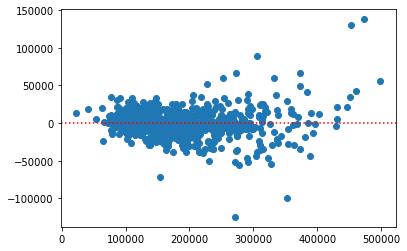

In [943]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

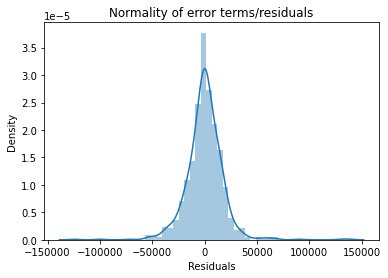

In [944]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Ridge Regression

Let's now try predicting house prices using ridge regression.

In [945]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [946]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [947]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 4.0}


In [948]:
#Fitting Ridge model for alpha = 4.0 and printing coefficients which have been penalised
alpha = 4.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.22977901e+04  1.38480307e+04  2.48998832e+04  4.51863228e+04
  2.58748522e+04  1.86431200e+04  4.62245574e+04  2.25588715e+03
  1.24885062e+04  4.20878499e+04  5.15265407e+04  3.39248461e+04
  6.16794306e+04  6.90576497e+03 -1.24730694e+03  1.93043091e+04
  5.84255083e+03 -2.62255047e+03  9.65377414e+03  2.36268358e+04
  8.27651135e+03  8.60051375e+03  6.01751635e+03  1.15813041e+04
 -2.76090117e+03 -1.67221571e+04 -8.96515576e+03 -2.03051742e+03
  2.12398953e+02  8.80093270e+03  3.87913135e+03  7.33117624e+03
  4.50098937e+02  1.31983316e+04 -2.16562144e+03 -3.27398113e+03
  5.25990812e+02  4.83426969e+03 -7.55453370e+03  1.07863407e+03
 -5.31253026e+03  8.14494220e+03 -9.84715499e+03 -6.85637165e+03
 -1.70660343e+03 -1.41880240e+03 -6.03730235e+03  1.96973749e+02
  5.60540978e+03  6.00831331e+03 -2.97713634e+03 -5.16941924e+03
  1.69867564e+04 -1.09076643e+04 -1.17131313e+04 -2.79792162e+03
 -6.92374502e+03 -1.10932735e+04 -9.70761296e+03  6.34280765e+03
 -7.60473885e+03  1.64036

In [960]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print('R2 score train : ', r2_train_ridge)
metric2.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('R2 score test  : ', r2_test_ridge)
metric2.append(r2_test_ridge)

rss1_ridge = np.sum(np.square(y_train - y_pred_train))
print('RSS score train : ', rss1_ridge)
metric2.append(rss1_ridge)

rss2_ridge = np.sum(np.square(y_test - y_pred_test))
print('RSS score test  : ', rss2_ridge)
metric2.append(rss2_ridge)

mse_train_ridge = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_ridge)
metric2.append(mse_train_ridge**0.5)

mse_test_ridge = mean_squared_error(y_test, y_pred_test)
print('MSE score test  : ', mse_test_ridge)
metric2.append(mse_test_ridge**0.5)

R2 score train :  0.9312282552036749
R2 score test  :  0.9159779854755847
RSS score train :  326689846452.397
RSS score test  :  194178269214.20966
MSE score train :  366244222.4802657
MSE score test  :  506992870.0109913


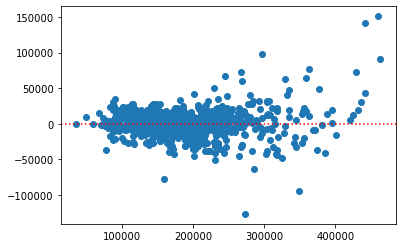

In [950]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

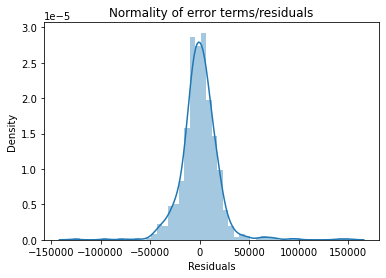

In [951]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

Let's now try predicting house prices using Lasso regression.

In [952]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [953]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [954]:
#Fitting Lasso model for alpha = 100 and printing coefficients which have been penalised

alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [955]:
lasso.coef_

array([-1.21035411e+04,  8.78463996e+03,  2.14223939e+04,  6.37595613e+04,
        2.78556489e+04,  1.29607404e+04,  4.26588277e+04, -0.00000000e+00,
        0.00000000e+00,  5.95337477e+04,  0.00000000e+00,  0.00000000e+00,
        1.70476017e+05,  2.42815331e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  7.06185173e+02,  2.06477084e+04,
        3.85952492e+03,  5.38833842e+03,  0.00000000e+00,  7.96922226e+03,
       -3.38373320e+02, -2.90250164e+04, -7.07711387e+03, -0.00000000e+00,
       -8.26939312e+01,  2.10173237e+03, -0.00000000e+00,  1.78519322e+03,
       -3.68829662e+03,  2.17377818e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  4.73709829e+02, -4.93524367e+03,  8.64670633e+02,
       -0.00000000e+00,  7.50036202e+03, -6.28743341e+03, -0.00000000e+00,
       -8.32807378e+02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  6.16163408e+03, -0.00000000e+00, -0.00000000e+00,
        1.89221952e+04, -

In [961]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 score train : ', r2_train_lasso)
metric3.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 score test  : ', r2_test_lasso)
metric3.append(r2_test_lasso)

rss1_lasso = np.sum(np.square(y_train - y_pred_train))
print('RSS score train : ', rss1_lasso)
metric3.append(rss1_lasso)

rss2_lasso = np.sum(np.square(y_test - y_pred_test))
print('RSS score test  : ', rss2_lasso)
metric3.append(rss2_lasso)

mse_train_lasso = mean_squared_error(y_train, y_pred_train)
print('MSE score train : ', mse_train_lasso)
metric3.append(mse_train_lasso**0.5)

mse_test_lasso = mean_squared_error(y_test, y_pred_test)
print('MSE score test  : ', mse_test_lasso)
metric3.append(mse_test_lasso**0.5)

R2 score train :  0.9261185671048902
R2 score test  :  0.9164108767004073
RSS score train :  350962652462.4142
RSS score test  :  193177840109.17255
MSE score train :  393455888.4107782
MSE score test  :  504380783.574863


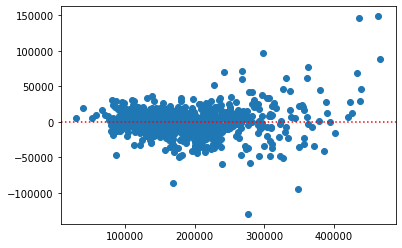

In [957]:
# Residual analysis
y_res = y_train - y_pred_train # Residuals

# Residual v/s predictions plot
plt.scatter(y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

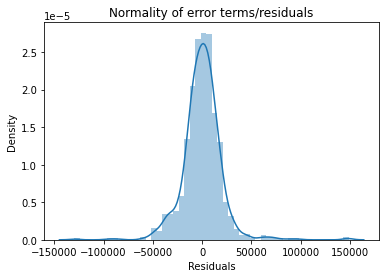

In [958]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Model Comparision

In [965]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.398263e-01,9.312283e-01,9.261186e-01
1,R2 Score (Test),-2.169494e+19,9.159780e-01,9.164109e-01
2,RSS (Train),2.858460e+11,3.266898e+11,3.509627e+11
3,RSS (Test),5.013787e+31,1.941783e+11,1.931778e+11
4,MSE (Train),1.790126e+04,1.913751e+04,1.983572e+04
5,MSE (Test),3.618125e+14,2.251650e+04,2.245842e+04


Lasso model has best R2 score on test data.

### Variables significant to predict house price are:

In [969]:
lasso_model = pd.DataFrame() 
lasso_model['Coeff Values'] = pd.Series(lasso.coef_) 
lasso_model['Variables'] = X_test.columns

lasso_model = lasso_model.loc[lasso_model['Coeff Values'] != 0]

lasso_model['Absolute Coefficent'] = lasso_model['Coeff Values'].apply(lambda x:abs(x))

lasso_model.sort_values(by=['Absolute Coefficent'], inplace=True, ascending=False)

lasso_model.head(12)

,Coeff Values,Variables,Absolute Coefficent
12,170476.016766,GrLivArea,170476.016766
3,63759.561313,OverallQual,63759.561313
9,59533.747672,TotalBsmtSF,59533.747672
6,42658.827669,BsmtFinSF1,42658.827669
25,-29025.016445,BuiltAge,29025.016445
4,27855.648890,OverallCond,27855.648890
135,-25892.771396,ExterQual_TA,25892.771396
62,24870.463151,Neighborhood_NridgHt,24870.463151
68,23686.733960,Neighborhood_StoneBr,23686.733960
134,-22755.877701,ExterQual_Gd,22755.877701
